Text(0.5, 1.0, 'Impact of data scale (SIFT1M)')

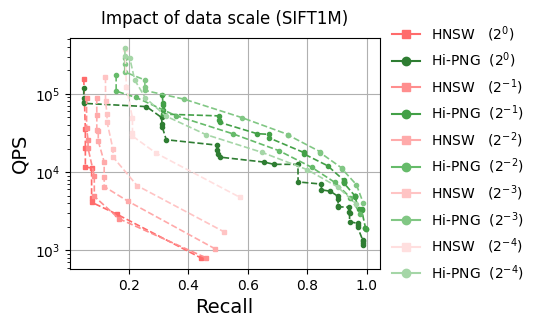

In [54]:
#W0sdnNjb2RlLXJlbW90ZQ%3D%3D
dataset = 'sift-128-euclidean'

from function import pareto_frontier
import json, os
import matplotlib.pyplot as plt
import numpy as np

perf_output = "perf/scale"

plt.figure(figsize=(4, 3))

colors1 = ['#FF6B6B', '#FF8E8E', '#FFAAAA', '#FFC4C4', '#FFDFDF']  # Red gradient
colors2 = ['#2E7D32', '#43A047', '#66BB6A', '#81C784', '#A5D6A7']  # Green gradient (darker to lighter)

for i in range(5):
    perf1 = json.load(open(os.path.join(perf_output, f"{dataset}.{i}.HNSW.json")))
    perf2 = json.load(open(os.path.join(perf_output, f"{dataset}.{i}.Hi-PNG-HNSW.json")))
    perf1, perf2 = pareto_frontier(perf1, 0), pareto_frontier(perf2, 0)
    recall1, recall2 = [item["recall"] for item in perf1], [item["recall"] for item in perf2]
    qps1, qps2 = [item["qps"] for item in perf1], [item["qps"] for item in perf2]
    plt.plot(recall1, qps1, marker='s', color=colors1[i], linewidth=1.2, linestyle='dashed', markersize=3)
    plt.plot(recall2, qps2, marker='o', color=colors2[i], linewidth=1.2, linestyle='dashed', markersize=3)

    plt.yscale('log')
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('QPS', fontsize=14) 
    plt.grid(True)

legend_elements = []
for i in range(5):
    legend_elements.append(plt.Line2D([0], [0], marker='s', color=colors1[i], label=f'HNSW   ($2^{{{-i}}}$)'))
    legend_elements.append(plt.Line2D([0], [0], marker='o', color=colors2[i], label=f'Hi-PNG  ($2^{{{-i}}}$)'))
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.title("Impact of data scale (SIFT1M)", pad=10)